## 单噪声源方法

考虑如下状态空间模型：
\begin{equation}
\label{eq:ssoe}
\begin{split}
y_t=z\alpha_{t-1}+e_t\\
\alpha_{t}=c+w \alpha_{t-1}+\gamma e_t 
\end{split}
\end{equation}
这和之前的状态空间模型唯一不同的地方就在于，该模型的状态方程和观察值是同一个噪声源，这样我们在执行卡尔曼滤波时就不需要对四个方程进行迭代，而只需要迭代如下两个方程：
\begin{equation}
\label{eq:SSOEfilter}
\begin{split}
e_t=y_t-z a_{t-1}\\
a_{t}=c+w a_{t-1}+\gamma e_t 
\end{split}
\end{equation}

### 单噪声源的指数平滑过程

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

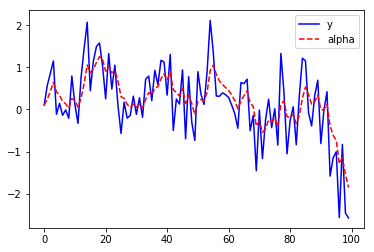

In [2]:
np.random.seed(213)
n=100
e=np.sqrt(.6)*np.random.randn(n)
gamma=.3
y=np.zeros(n)
alpha=np.zeros(n)
y[0]=e[0]
alpha[0]=e[0]
for t in range(1,n):
    y[t]=alpha[t-1]+e[t]
    alpha[t]=alpha[t-1]+gamma*e[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  

下面我们只需要迭代两个式子即可对该模型的参数进行估计：

In [8]:
a=np.zeros(n)
a[0]=y[0]
e=np.zeros(n)
def EstimateSS(mypa):
    gamma=mypa
    for t in range(1,n):
        e[t]=y[t]-a[t-1]
        a[t]=a[t-1]+gamma*e[t]
    return np.sum(e**2)/n
res=optimize.minimize(EstimateSS,[0.2],method="TNC",bounds =[(0,1)])
print("极大似然估计所得结果：",res.x)
print("真实参数：",gamma)

极大似然估计所得结果： [ 0.36216987]
真实参数： 0.3


### 单噪声源的Theta method序列：

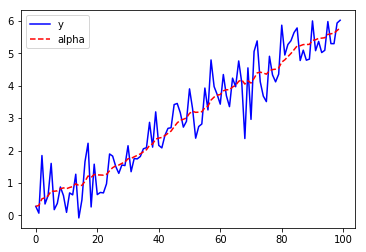

In [10]:
np.random.seed(5)
n=100
e=np.sqrt(.4)*np.random.randn(n)
gamma=.1
con=.05
y=np.zeros(n)
alpha=np.zeros(n)
y[0]=e[0]
alpha[0]=e[0]
for t in range(1,n):
    y[t]=alpha[t-1]+e[t]
    alpha[t]=con+alpha[t-1]+gamma*e[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  

同样地，我们只需要迭代两个式子即可完成对参数的估计：

In [18]:
a=np.zeros(n)
a[0]=y[0]
e=np.zeros(n)
def EstimateSS(mypa):
    gamma=abs(mypa[0])
    co=abs(mypa[1])
    for t in range(1,n):
        e[t]=y[t]-a[t-1]
        a[t]=co+a[t-1]+gamma*e[t]
    return np.sum(e**2)/n
res=optimize.minimize(EstimateSS,[0.2,.1])
print("极大似然估计所得结果：",res.fun,res.x)
print("真实参数：",[0.4,gamma,con])

极大似然估计所得结果： 0.3272215646370634 [ -7.45068677e-09   5.65246729e-02]
真实参数： [0.4, 0.1, 0.05]


上述过程估计得出了常数项和gamma，同时似然函数的最小值即为噪声的方差。

### 练习：

生成下列damped trend model，并用极大似然函数估计其参数：
\begin{equation}\label{eq:dampedtrend}
  \begin{split}
y_t=\alpha_{t-1}+\phi\beta_{t-1}+e_t\\
\alpha_{t}=\alpha_{t-1}+\phi\beta_{t-1}+\gamma e_t\\
\beta_{t}=\phi\beta_{t-1}+\theta e_t\\
\end{split}
\end{equation}

其中$\sigma_e^2=.5$; $\gamma=.6$; $\phi=.93$; $\theta=.2$


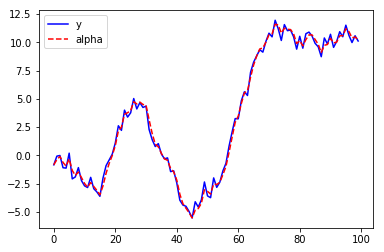

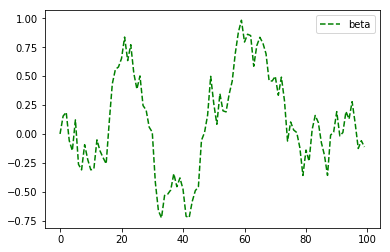

In [21]:
np.random.seed(123)
n=100
e=np.sqrt(.6)*np.random.randn(n)
gamma=.6
theta=.2
phi=.93
y=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
y[0]=e[0]
alpha[0]=e[0]
beta[0]=0
for t in range(1,n):
    beta[t]=phi*beta[t-1]+theta*e[t]
    alpha[t]=alpha[t-1]+phi*beta[t-1]+gamma*e[t]
    y[t]=alpha[t-1]+phi*beta[t-1]+e[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.legend()
plt.show()  
plt.plot(beta,'g--',label='beta')
plt.legend()
plt.show()  

下面对该序列进行估计：

In [22]:
a=np.zeros(n)
b=np.zeros(n)
a[0]=y[0]
b[0]=0
ee=np.zeros(n)
def EstimateDT(mypa):
    gamma=abs(mypa[0])
    theta=abs(mypa[1])
    phi=abs(mypa[2])
    for t in range(1,n):
        ee[t]=y[t]-a[t-1]-phi*b[t-1]
        a[t]=a[t-1]+phi*b[t-1]+gamma*ee[t]
        b[t]=phi*b[t-1]+theta*ee[t] 
    return np.sum(ee**2)/n
res=optimize.minimize(EstimateDT,[.1,.1,.8])
print("极大似然估计所得结果：",res.x)
truepara=[gamma,theta,phi]
print("真实参数：",truepara)

极大似然估计所得结果： [ 0.50711884  0.30993111  0.84600905]
真实参数： [0.6, 0.2, 0.93]


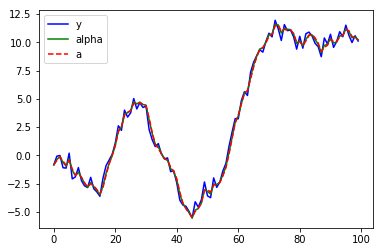

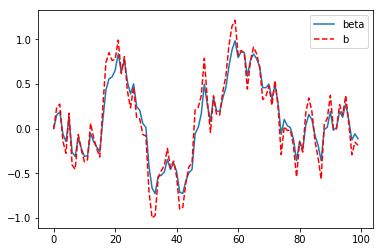

In [23]:
gamma=res.x[0]
theta=res.x[1]
phi=res.x[2]
for t in range(1,n):
    ee[t]=y[t]-a[t-1]-phi*b[t-1]
    a[t]=a[t-1]+phi*b[t-1]+gamma*ee[t]
    b[t]=phi*b[t-1]+theta*ee[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'g',label="alpha")
plt.plot(a,'r--',label='a')
plt.legend()
plt.show()  
plt.plot(beta,label='beta')
plt.plot(b,'r--',label='b')
plt.legend()
plt.show()  

通过以上三个例子可以看出，单噪声源的序列因为迭代简单，最终结果十分估计准确。